# Correlation

## Introduction



In this notebook we will learn how to correlate two variables/signals, and what 'correlate' means. 


The correlation in general is used to measure the degree of similarity between two functions/signals.

The 'classic' linear correlation defined by one coefficient is often used when two signals happen at/have the same time and are of different origin. So to say independent of time.

While Cross-/AutoCorrelation is usually used when comparing the same type of signal but for different time.


<div class ="alert alert-warning">
One important aspect:

 Correlation ≠ Causation
 
Even if two things correlate, that does not directly mean one is the cause for the other.
</div>
 
 

Correlation applications:
- aa

Cross-/AtuoCorrelation application:
- repeating patterns

Lectures:
-  aa


## Table of Contents
- [Classic Correlation](#Correlation)
- [Autocorrelation](#Autocorrelation)
- [Cross-correlation](#Cross-correlation)
- [Summary](#Summary)

# Better examples for correlations?

<a id='Correlation'></a> 
# Classic Correlation



The correlation measures how similar the trend of two variables is, independent of the time.

[More to correlation](https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/)

In [2]:
import numpy as num
import matplotlib.pyplot as plt

First, as always, creating some synthetic noisy data.

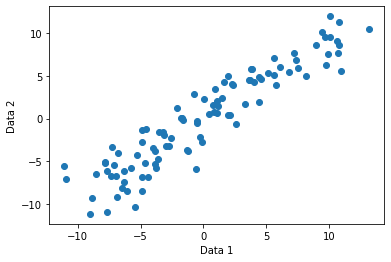

In [7]:
# Creating data
num.random.seed(0)
datlen = 100
data1 = num.linspace(-10, 10, datlen) + num.random.normal(0, 2, datlen)
data2 = num.linspace(-10, 10, datlen) + num.random.normal(0, 1, datlen)

plt.figure()
plt.scatter(data1, data2)
plt.xlabel('Data 1')
plt.ylabel('Data 2')
plt.show()

Now we can calculate the covariance matrix and two correlation coefficients:
### Help for interpretation of convariance matrix 

In [8]:
covariance = num.cov(data1, data2)
print('Covariance:\n', covariance)

from scipy.stats import pearsonr, spearmanr

# Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
# Gaussian or Gaussian-like distribution
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation coefficient : %.3f' % corr)

# Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))
# non-Gaussian distribution
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % corr)

Covariance:
 [[36.41193673 32.57145535]
 [32.57145535 33.44591071]]
Pearsons correlation coefficient : 0.933
Spearmans correlation coefficient: 0.938


The correlation coefficient is defined between -1 and 1. 
1 mean perfect correlation, while -1 means perfect anti-correlation. If the coefficient is 0 the variable are not correlated at all. 

### Tasks
- Change sign
- Change randomness/increase std

### Non-linear correlation is not so trivial

# Signal Correlation

It is possible to include the time information into the correlation. 
Cross-correlation investigates how similiar two (time)signal are and additional at which (lag/shift) time the correlation is the highest. As a results, instead of a single value we obtain a new 'trace' consisting of "correlation coefficients" for different shift/lag times.
If the signal is correlate with itself, it is called Autocorrelation.


<a id='Autocorrelation'></a> 
## Autocorrelation
Starting with a simple two pulse signal.

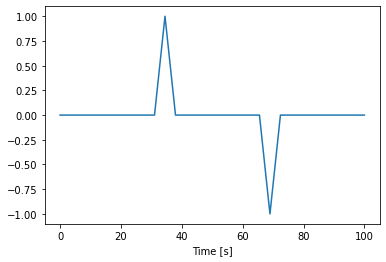

In [12]:
import numpy as num
import matplotlib.pyplot as plt
from scipy import signal
import time

# Creating data
xdata = num.linspace(0, 100, 30)
ydata = num.zeros(len(xdata))
ydata[10] = 1
ydata[20] = -1
# ydata[15] = 1
# ydata[5] = 1

plt.figure()
plt.plot(xdata, ydata)
plt.xlabel('Time [s]')
plt.show()

Doing the Autocorrelation:

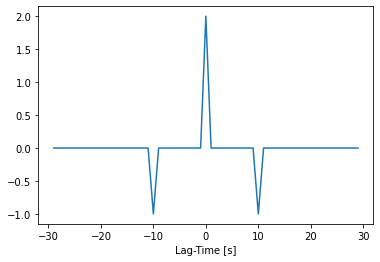

In [13]:
# Autocorrelation

corr = signal.correlate(ydata, ydata)
lags = signal.correlation_lags(len(ydata), len(ydata))

plt.figure()
plt.plot(lags, corr)
plt.xlabel('Lag-Time [s]')
plt.show()

At lag-time 0 there is the highest correlation, an two negative peaks with half the absolue amplitude. To understand  this procedure in more detail, we created a function to visualize the correlation in detail.

In [14]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

def signal_correlation_animation(sig1, sig2, pausetime=0.):
    ## might be a small WARNING bug
    
    if len(sig2) > len(sig1):
        sig2_alt = sig2
        sig1_alt = sig1
    
        sig2 = sig1_alt
        sig1 = sig2_alt
        
    x1 = num.arange(len(sig1))
    x2 = num.arange(len(sig2))
    
    fig, axs = plt.subplots(2,1, figsize=(16,9))
    ax1 = axs[0]
    ax2 = axs[1]
     
    corr = signal.correlate(sig1, sig2)
    lags = signal.correlation_lags(len(sig1), len(sig2))
     
    crosscorr = [0]
    for ii in range(len(sig1) + len(sig2)):
        if ii == 0:
            continue
        
        if ii <= len(sig1):
            idxx = (ii - len(sig2))
            if idxx < 0:
                idxx = 0
            x = sig1[idxx: ii]
        else:
            xx = ii - len(sig1)
            x = sig1[xx + abs(len(sig1) - len(sig2)): ]
        
        if ii <= len(sig2):
            idxy = -ii + len(sig1)
            if idxy >= 0:
                idxy = None
            y = sig2[-ii: idxy]
        else:
            yy = ii - len(sig2)
            idxyy = len(sig1) -yy
            if idxyy > len(sig2):
                idxyy = None
            y = sig2[:idxyy]
        
        crosscorr.append(num.sum(x * y))
        
        ax1.cla()
        ax1.plot(lags, corr, color='orange', alpha=0.5, zorder=-2)
        ax1.scatter(num.arange(len(crosscorr)) - len(sig2), crosscorr, c='blue')
        ax1.set_xlabel('Lag-Time [s]')
        
        ax2.cla()
        ax2.plot(x1 + len(sig2) - ii, sig1)
        ax2.plot(x2, sig2)
        ax2.set_xlim(-len(sig1), len(sig1) + len(sig2))
        ax2.set_xlabel('Time [s]')

        display(fig)
        
        if pausetime >= 0.01:
            plt.pause(pausetime)
        
        if ii + 1 == len(sig1) + len(sig2):
            clear_output(wait=False)
        else:
            clear_output(wait=True)
    
    return

In [15]:
# As inputarguments data1, data2 and pausetime between each step
signal_correlation_animation(ydata, ydata, pausetime=0.2)

### Tasks:
- Play with different data
- Correlate random noise

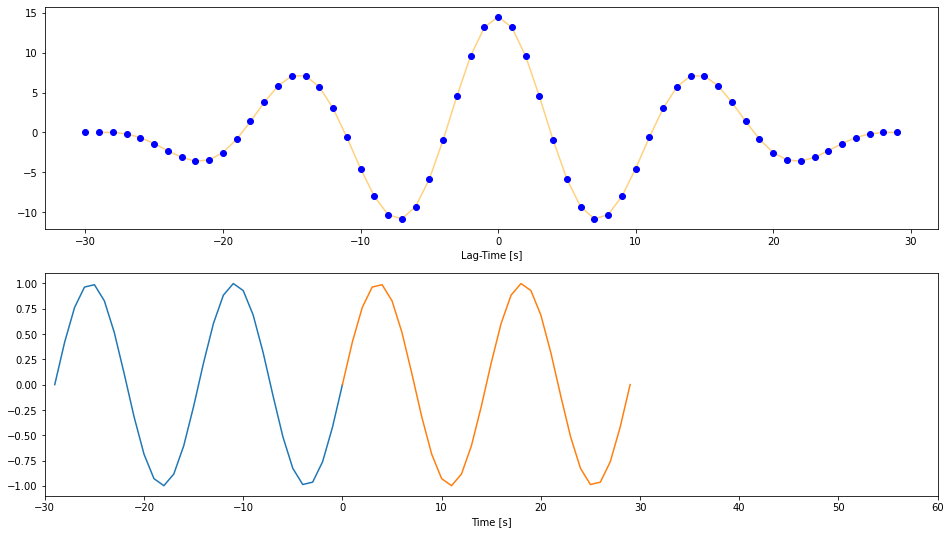

In [13]:
# Creating data
xdata = num.linspace(0, 200, 30)
ydata = num.sin(2*num.pi*xdata/100)
# ydata = num.zeros(30) #+ num.random.normal(0, 2,len(xdata))
# ydata[10] = 1
# ydata[20] = -1
# ydata[15] = 1
# ydata[5] = 1


signal_correlation_animation(ydata, ydata, pausetime=0.001)


# corr = signal.correlate(ydata, ydata)
# lags = signal.correlation_lags(len(ydata), len(ydata))

# plt.figure()
# plt.plot(lags, corr)
# plt.xlabel('Lag-Time [s]')
# plt.show()


# Cross Correlation
It gets more interesting when the signals are not the same. Starting here with a simple example of sinus and cosine.

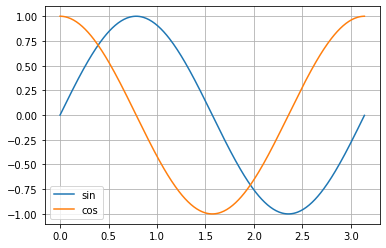

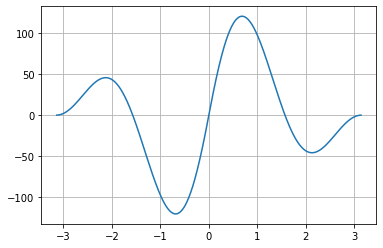

In [40]:
df = 100
xdata = num.arange(num.pi * df) / df
ysin = num.sin(2*num.pi*xdata * 1/ num.pi)
ycos = num.cos(2*num.pi*xdata * 1/ num.pi)

plt.figure()
plt.plot(xdata, ysin, label='sin')
plt.plot(xdata, ycos, label='cos')
plt.legend()
plt.grid()

corr = signal.correlate(ysin, ycos)
lags = signal.correlation_lags(len(ysin), len(ycos))

plt.figure()
plt.plot(lags / df, corr)
plt.grid()
plt.show()

# signal_correlation_animation(ysin, ycos, pausetime=0.0)

We see now that the absolute maximum is reache twice, once positive and once negative but not a lag time of 0. 



For the correlation the two signals doesn't need to have the same length. It is possible that a smaller signal should be correlated against a longer one.

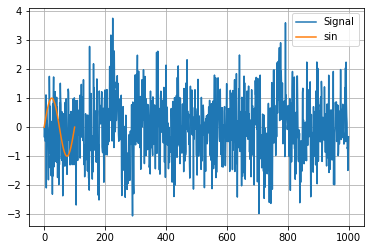

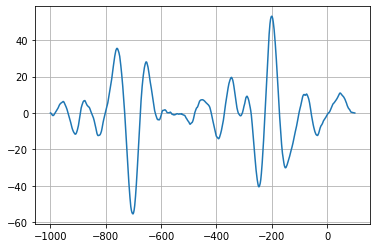

In [61]:
# With noise

xdata = num.linspace(0, 100, 100)
ysin = num.sin(2*num.pi*xdata)
#ycos = num.cos(2*num.pi*xdata)

xdata2 = num.linspace(0, 1000, 1000)
ydata = num.zeros(len(xdata2))
ydata[200:200 + len(ysin)] = ysin
ydata[700:700 + len(ysin)] = -ysin
ydata += num.random.normal(0, 0.99, len(xdata2))

plt.figure()
plt.plot(xdata2, ydata, label='Signal')
plt.plot(xdata, ysin, label='sin')
plt.legend()
plt.grid()
plt.show()

corr = signal.correlate(ysin, ydata)
lags = signal.correlation_lags(len(ysin), len(ydata))

plt.figure()
plt.plot(lags, corr)
plt.grid()
plt.show()

# signal_correlation_animation(ysin, ydata, pausetime=0.001)

### Tasks:
- Play with different data
- Correlate random noise

<a id='Summary'></a> 
# Summary

We have learned
- two variable can be tested if the correlate with Pearsons correlation (Gaussian distributions) or the Spearman's correlation (non-Gaussian distribution).
- how to compare two (time) signals can be tested on correlation with the Auto- (if its twice the same signal) or Cross-correlation. Besides the maximum value also the side-peaks can be of interest and therefore their lag time.